# Playing with Probabilities and Law of Large Numbers 
### ~ Sanskar Shrivastava 

We visualize the diffrenece between theoritical and empirical probability in this notebook

#### Problem - 
##### 'In a certain game, in phase one, you flip one coin as many as three times. If you flip three tails, you lose.As soon as you get your first head in phase one, you advance to phase two. In phase two, you roll a six-sided die once.If you roll a six, you win. For any other roll, you lose. What is the probability of winning?'


I got the idea to do this while solving an aptitude problem , so i took the question as the foundation on which we will build our experiment


In [1]:
# importing all the required stuff
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [2]:
# prepare the tools
coin = ['H', 'T']
dice = [1, 2, 3, 4, 5, 6]

## Empirical Probability Calculation 
When you gather data from observations during an experiment, you will be calculating an empirical (or experimental) probability.

The empirical (or experimental) probability of an event is an "estimate" that an event will occur based upon how often the event occurred after collecting data from an experiment in a large number of trials. This type of probability is based upon direct observations. Each observation in an experiment is called a trial.
 

In [3]:
# set phase one of the game
def phase_one(coins, flips=3):
    seq = ''.join([random.choice(coins) for i in range(flips)])
    if 'H' in seq:
        return 1  # won
    else:
        return 0  # lost


def probability_winning_Phase_one(coins, turns):
    results = [phase_one(coins) for i in range(turns)]
    return results.count(1) / len(results)


# set the phase two of the game
def phase_two(dice):
    number = random.choice(dice)
    if number == 6:
        return 1  # won
    else:
        return 0  # lost


def probability_winning_Phase_two(dice, turns):
    results = [phase_two(dice) for i in range(turns)]
    return results.count(1) / len(results)


# playing the game
def game(coins, dice):
    # results = []
    if phase_one(coins) == 0:
        return 0
    else:
        if phase_two(dice) == 1:
            return 1
        else:
            return 0


def probability_winning_game(coins, dice, turns):
    results = [game(coins, dice) for i in range(turns)]
    return results.count(1) / len(results)


## Theoritical Probability Calculation

With theoretical probability, you do not actually conduct an experiment. Instead, you use what you know about the situation to determine the probability of an event occurring. You may use your reasoning skills or an existing formula to arrive at your answer.

The theoretical probability of an event occurring is an "expected" probability based upon knowledge of the situation. It is the number of favorable outcomes to the number of possible outcomes.




In [4]:
"""
Here we are going solve the problem in an quotidian manner 

"When two events are independent of one another we multiply their probabililties to get the result"

Phase one of the game is independent of phase two , because the result of phase two does not effect phase one .
So our answer will be =  
                        (Probability of winning phase one * Probability of winning phase two)
                        
And for P(Phase one),
to make things easy we can solve as ,
prob of winning = 1 - prob of losing 

and getting three tails in a row is the only way we lose , so me multiply the probabilities of getting tails thrice as
we have three tosses , which equals to : 1/2*1/2*1/2
and,
prob of winning = 1 - 1/2*1/2*1/2
"""


# 1 - 1/2 * 1/2 * 1/2
theo_prob_phase_one = round((7/8), 3)

# probablitity  of getting six in a die
theo_prob_phase_two = round((1/6), 3)

# probablity of game
# as they are independent
theo_prob_game = round((theo_prob_phase_one * theo_prob_phase_two), 3)

print("Theoritical Prob of winning phase one : {}\n"
      "Theoritical Prob of winning phase two: {}\n"
      "Theoritical Prob of winning game : {}".format(theo_prob_phase_one,  theo_prob_phase_two, theo_prob_game))


Theoritical Prob of winning phase one : 0.875
Theoritical Prob of winning phase two: 0.167
Theoritical Prob of winning game : 0.146


#### Simulating the model


In [5]:
def simlulations(phase, coin, dice):
    
    """
    We will run the simulation for 100k trials first and look at the results.
    I simulated the last event for 1M trials to get an acceptable plot .
    
    """
    if phase == 0 :
      phase_one_probs = [probability_winning_Phase_one(coin, turns=i) for i in range(1000, 102000, 5000)]
      return phase_one_probs
    elif phase == 1:
      phase_two_probs = [probability_winning_Phase_two(dice, turns=i) for i in range(1000, 102000, 5000)]
      return phase_two_probs
    elif phase == 2:
      phase_game_probs = [probability_winning_game(coin, dice, turns=i) for i in range(1000, 102000, 5000)]
      return phase_game_probs
    elif phase == 3:
      phase_game_probs = [probability_winning_game(coin, dice, turns=i) for i in range(1000, 1000000, 5000)]
      return phase_game_probs_mil
    

#### Plotting the results

X axis - Probability After 1000, 6000 ................100000 trials (1000000 in 4th plot )

Y axis - Probablity ranges

##### Phase 1


<Figure size 432x288 with 0 Axes>

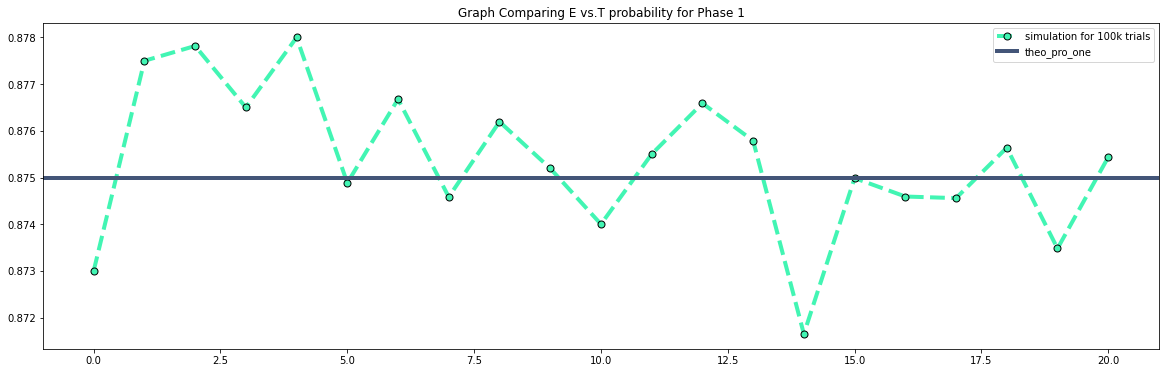

In [9]:
plt.clf()

y = simlulations(0, coin, dice)
y2 = theo_prob_phase_one

plt.figure(figsize= (20, 6))

plt.title("Graph Comparing E vs.T probability for Phase 1")
#plt.yticks([0, 0.400, 0.875, 1.275])

plt.plot(y, label='simulation for 100k trials', color='#42f5b3', linewidth = 4, marker='.', linestyle='--', markersize=14, markeredgecolor = 'black')
plt.axhline(y2, label='theo_pro_one', color='#435578', linewidth = 4, linestyle='-', markersize=14, markeredgecolor = 'black')

plt.savefig('plot1')
plt.legend()
plt.show()

##### Phase 2


<Figure size 432x288 with 0 Axes>

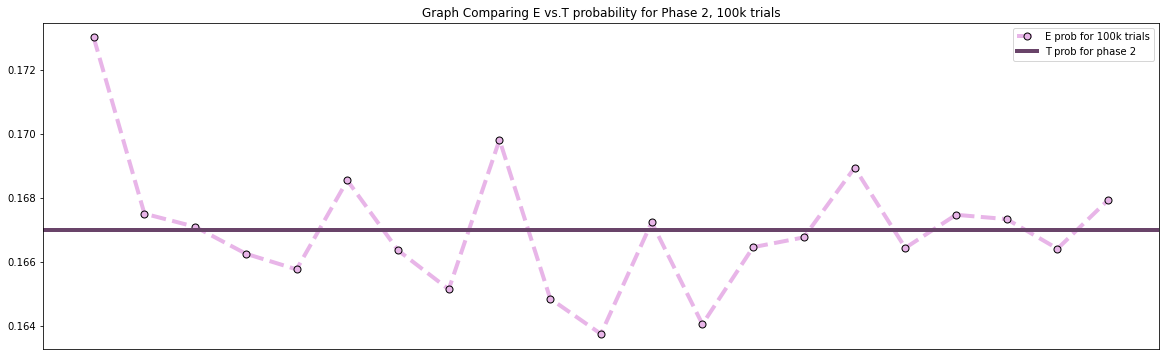

In [8]:
plt.clf()
y_p2 = simlulations(1, coin, dice)
y2_p2 = theo_prob_phase_two

plt.figure(figsize= (20, 6))

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

plt.title("Graph Comparing E vs.T probability for Phase 2, 100k trials")

plt.plot(y_p2, label='E prob for 100k trials', color='#e8b5e8', linewidth = 4, marker='.', linestyle='--', markersize=14, markeredgecolor = 'black')
plt.axhline(y2_p2, label='T prob for phase 2', color='#694469', linewidth = 4, linestyle='-', markersize=14, markeredgecolor = 'black')

plt.savefig('plot2')
plt.legend()
plt.show()

##### Phase Game


<Figure size 432x288 with 0 Axes>

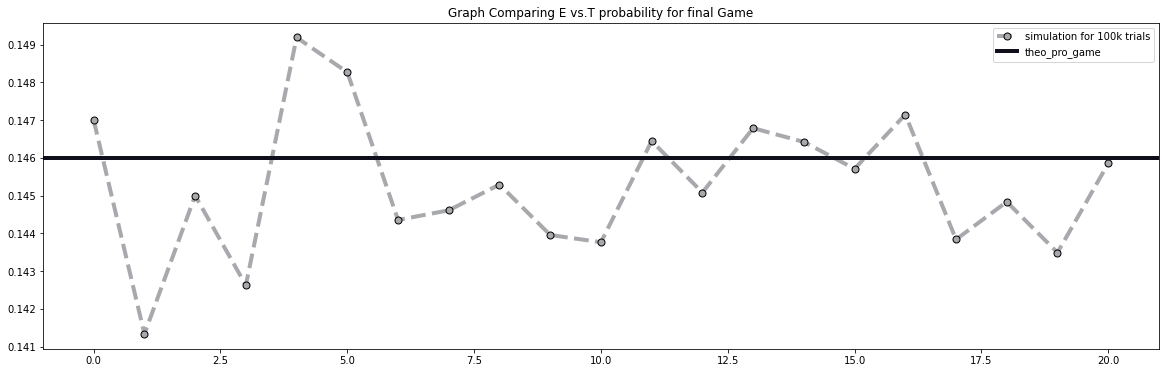

In [23]:
plt.clf()
y_pf = simlulations(2, coin, dice)
yf_pf = theo_prob_game

plt.figure(figsize= (20, 6))

plt.title("Graph Comparing E vs.T probability for final Game , 100K trials")

plt.plot(y_pf, label='simulation for 100k trials', color='#a8a9ad', linewidth = 4, marker='.', linestyle='--', markersize=14, markeredgecolor = 'black')
plt.axhline(yf_pf, label='theo_pro_game', color='#0f0f1c', linewidth = 4, linestyle='-', markersize=14, markeredgecolor = 'black')

plt.legend()
plt.show()

##### Phase Game with 1 Million trials


<Figure size 432x288 with 0 Axes>

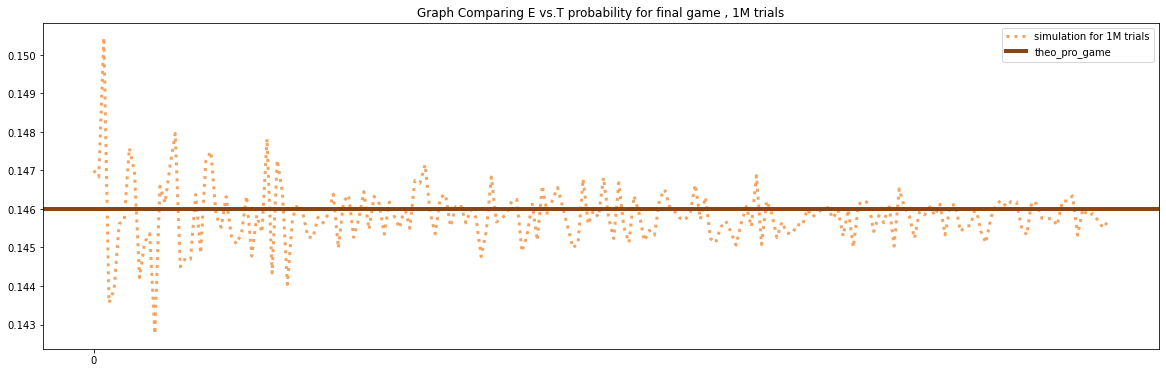

In [11]:
plt.clf()
y_pf = simlulations(3, coin, dice)
yf_pf = theo_prob_game

plt.figure(figsize= (20, 6))

plt.title("Graph Comparing E vs.T probability for final game , 1M trials")
plt.xticks([0, 100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])

plt.plot(y_pf, label='simulation for 1M trials', color='sandybrown', linewidth = 3, linestyle=':')
plt.axhline(yf_pf, label='theo_pro_game', color='saddlebrown', linewidth = 4, linestyle='-', markersize=14, markeredgecolor = 'black')

plt.legend()
plt.show()

### We Just looked at the " Law of Large Numbers " above

#### Defination - 
The law of large numbers is a theorem from probability and statistics that suggests that the average result from repeating an experiment multiple times will better approximate the true or expected underlying result

Our little experiment shows that for 1 million trials the empirical probability graph approaches the theoritical probability graph

To get in more details ,

[Law of Large numbers](https://www.sciencedirect.com/topics/mathematics/laws-of-large-number) ,

[Khan Academy guide](https://www.khanacademy.org/math/cc-seventh-grade-math/cc-7th-probability-statistics/cc-7th-theoretical-and-experimental-probability/v/comparing-theoretical-to-experimental-probabilites), 

[How it's helpful in Machine learning](https://machinelearningmastery.com/a-gentle-introduction-to-the-law-of-large-numbers-in-machine-learning/)


